KNN

to clean a dataset
data.isnull().sum() return num of missing values
data.dropna() drops rows with missing values
data.dropna(axis=1) drops columns with missing values

to fill na w/constants
data['col name'].data.fillna(0, inplace = True) fills missing values with 0

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [129]:
df = pd.read_csv('heart.csv')


In [130]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [131]:
X = df.drop('target', axis = 1)
Y = df['target'] 

In [132]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)


In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_x,Y,test_size=0.2, random_state=2)

In [134]:
accuracies = {}
for i in range(1,251):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    accuracies[i] = accuracy_score(Y_test, predictions)
    


In [135]:
print("Neighbor w/ Max Accuracy Score: ", max(accuracies, key = accuracies.get))
print("Accuracy Score of Neighbor w/ Max Accuracy Score: ", accuracies[max(accuracies, key = accuracies.get)])

print("Neighbor w/ Min Accuracy Score: ", min(accuracies, key = accuracies.get))
print("Accuracy Score of Neighbor w/ Min Accuracy Score: ", accuracies[min(accuracies, key = accuracies.get)])

Neighbor w/ Max Accuracy Score:  1
Accuracy Score of Neighbor w/ Max Accuracy Score:  1.0
Neighbor w/ Min Accuracy Score:  137
Accuracy Score of Neighbor w/ Min Accuracy Score:  0.8


In [136]:
accuracies

{1: 1.0,
 2: 0.9512195121951219,
 3: 0.9365853658536586,
 4: 0.9121951219512195,
 5: 0.8292682926829268,
 6: 0.848780487804878,
 7: 0.8585365853658536,
 8: 0.8536585365853658,
 9: 0.8926829268292683,
 10: 0.8829268292682927,
 11: 0.8731707317073171,
 12: 0.8634146341463415,
 13: 0.8634146341463415,
 14: 0.8634146341463415,
 15: 0.8682926829268293,
 16: 0.8536585365853658,
 17: 0.8731707317073171,
 18: 0.8829268292682927,
 19: 0.8731707317073171,
 20: 0.8682926829268293,
 21: 0.8585365853658536,
 22: 0.848780487804878,
 23: 0.8585365853658536,
 24: 0.8585365853658536,
 25: 0.8682926829268293,
 26: 0.8585365853658536,
 27: 0.8536585365853658,
 28: 0.8536585365853658,
 29: 0.8536585365853658,
 30: 0.8682926829268293,
 31: 0.8439024390243902,
 32: 0.8390243902439024,
 33: 0.8439024390243902,
 34: 0.8439024390243902,
 35: 0.8390243902439024,
 36: 0.8585365853658536,
 37: 0.8536585365853658,
 38: 0.8585365853658536,
 39: 0.8536585365853658,
 40: 0.8439024390243902,
 41: 0.848780487804878,
 4

In [137]:
knn =  KNeighborsClassifier(n_neighbors=1)
accuracies = {}
for i in range(1,11):
    X_train, X_test, Y_train, Y_test = train_test_split(scaled_x, Y, test_size=0.2, random_state=i)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    accuracies[i] = accuracy_score(Y_test, predictions)

    

In [138]:
print(max(accuracies, key = accuracies.get), " seed value has the highest accuracy: ", accuracies[max(accuracies, key = accuracies.get)])
print(min(accuracies, key = accuracies.get), " seed value has the lowest accuracy: ", accuracies[min(accuracies, key = accuracies.get)])

1  seed value has the highest accuracy:  1.0
7  seed value has the lowest accuracy:  0.9804878048780488


In [139]:
accuracies

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 0.9853658536585366,
 7: 0.9804878048780488,
 8: 1.0,
 9: 0.9853658536585366,
 10: 1.0}

In [140]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_x,Y,test_size=0.3,random_state=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
predictions = knn.predict(X_test)

In [141]:
accuracy_score(Y_test, predictions)

0.987012987012987

In [142]:
f1_score(Y_test, predictions)

np.float64(0.9865771812080537)

In [143]:
cm = confusion_matrix(Y_test, predictions)

In [144]:

cm

array([[157,   4],
       [  0, 147]])

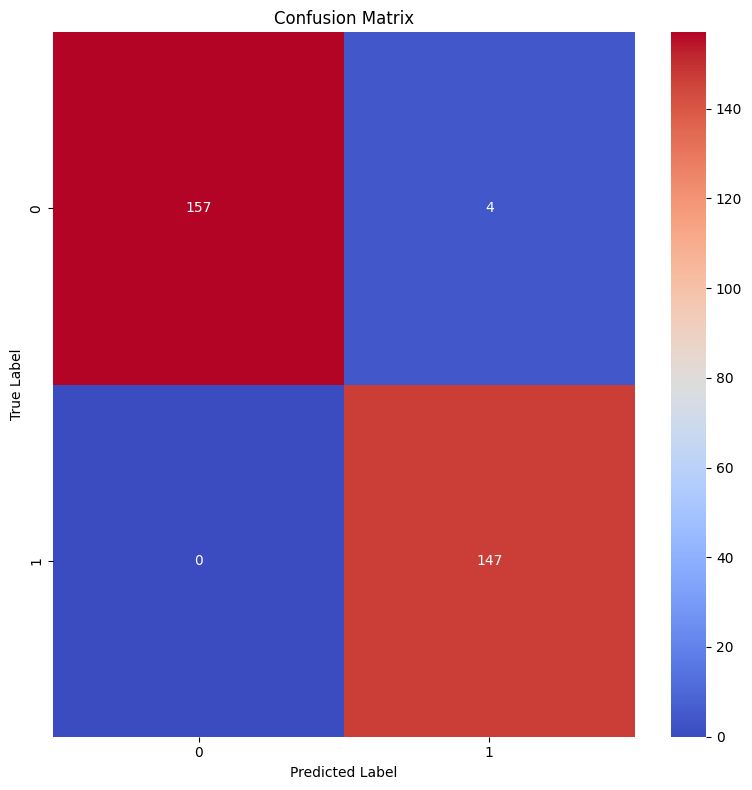

In [145]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [146]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
cv_scores = cross_val_score(knn,scaled_x,Y,cv = kf, scoring = 'accuracy')

In [147]:
import numpy as np
np.mean(cv_scores)

np.float64(0.9970873786407767)